# Лабораторная 3 "Dlib with OpenFace
# Вариант 33
# Выполннл студент группы М19-ИВТ-3
# Суворкинн Павел

##Задание: Используя библиотеку DeepFace реализовать систему верификации человека по изображению лица.
##Face detector:  Dlib
##Face recognition model: OpenFace

# План:
## 1) Монтирование диска
## 2) Установка deepface
## 3) Импорт библиотек
## 4) Путь к файлам
## 5) Функции детектирования и верификации
## 6) Вычисление дескрипторов
## 7) Тест на изображении
## 8) Тест на видео с вебки


## 1) Монтирование диска

In [ ]:
# Монтирование гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) Установка deepface

In [ ]:
#!pip install deepface

## 3) Импорт библиотек

In [ ]:
import numpy as np
from keras.preprocessing import image
from deepface import DeepFace
import cv2
import dlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib
from skimage import io
from scipy.spatial import distance

## 4) Путь к файлам

In [ ]:
img1_path = "/content/drive/My Drive/LAB_3/1.jpg"
img2_path = "/content/drive/My Drive/LAB_3/5.jpg"
img3_path = "/content/drive/My Drive/LAB_3/7.jpg"
img4_path = "/content/drive/My Drive/LAB_3/2.jpg"
#enforce_detection = False
backend = 'dlib'

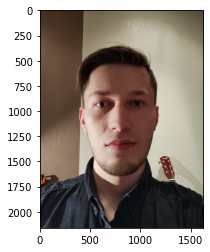

In [ ]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img1_path)), cv2.COLOR_BGR2RGB)
imshow(image)

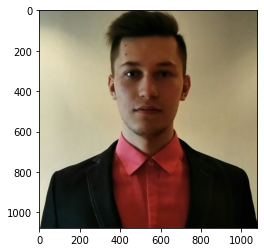

In [ ]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img2_path)), cv2.COLOR_BGR2RGB)
imshow(image)

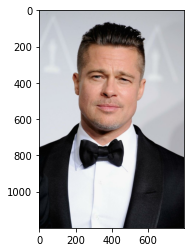

In [ ]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img3_path)), cv2.COLOR_BGR2RGB)
imshow(image)

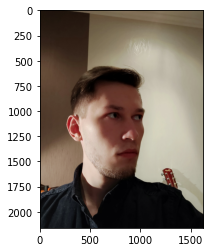

In [ ]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img4_path)), cv2.COLOR_BGR2RGB)
imshow(image)

## 5) Функции детектирования и верификации

In [ ]:
def verify(img1_path, img2_path):
  # Face recognition model:
  model = "OpenFace"
  # Metric:
  metric = "euclidean"
  # Face Detector:
  backend = 'dlib'

  #face detection and alignment
  detected_face_1 = DeepFace.detectFace(img1_path, detector_backend = backend)
  detected_face_2 = DeepFace.detectFace(img2_path, detector_backend = backend)
  result = DeepFace.verify(img1_path, img2_path, model_name = model, distance_metric = metric, detector_backend = backend)

  data = [img1_path, img2_path]
  scale = 10 #МАСШТАБ КАРТИНОК
  plt.figure(figsize=(scale,scale))
  for i in range(2):
      plt.subplot(1,2,i+1)
      plt.imshow(cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2RGB))
  plt.show()
  #plt.imshow(detected_face_1, detected_face_2)
  #plt.show()
  print("Это один человек? ", result["verified"]) 
  print("distance: ", result["distance"]) 
  print("max_threshold_to_verify", result["max_threshold_to_verify"]) 
  print("model:", result["model"]) 
  return(result["distance"])
  

In [ ]:
def show_face(img1_path, img2_path):
  # Face Detector:
  backend = 'dlib'
  detected_face_1 = DeepFace.detectFace(img1_path, detector_backend = backend)
  detected_face_2 = DeepFace.detectFace(img2_path, detector_backend = backend)
  face = [detected_face_1, detected_face_2]
  scale = 10 #МАСШТАБ КАРТИНОК
  plt.figure(figsize=(scale,scale))
  for i in range(2):
      plt.subplot(1,2,i+1)
      plt.imshow(face[i])
  plt.show()

In [ ]:
def descriptor(img_path):
  facerec  = dlib.face_recognition_model_v1('/content/drive/My Drive/LAB_3/dlib_face_recognition_resnet_model_v1.dat')
  sp = dlib.shape_predictor('/content/drive/My Drive/LAB_3/shape_predictor_68_face_landmarks.dat')
  detector = dlib.get_frontal_face_detector()
  img = io.imread(img_path)
#img = cv2.cvtColor(cv2.imread(cv2.os.path.join(img1_path)), cv2.COLOR_BGR2RGB)
  dets = detector(img, 1)
  for k, d in enumerate(dets):
    print("Descriptor:")
    shape = sp(img, d) 
  face_descriptor = facerec.compute_face_descriptor(img, shape)
  print(face_descriptor)
  return(face_descriptor)

## 6) Вычисление дескрипторов

In [ ]:
fd_1 = descriptor(img1_path)

Descriptor:
-0.0942894
0.142105
-0.00933867
0.0765951
-0.136822
0.0530755
-0.0790341
-0.096323
0.0944069
-0.0822096
0.270253
0.0671365
-0.200922
-0.102535
0.0814461
0.0971227
-0.0973596
-0.180679
-0.056184
0.00898628
0.00678423
0.00816338
0.0473094
0.0608744
-0.068608
-0.410607
-0.06847
-0.0176856
0.137367
-0.0949185
-0.0619767
0.0697285
-0.141774
-0.0460226
0.0544866
0.103817
-0.0366673
-0.0227382
0.210973
-0.0226682
-0.170372
0.0516507
0.0379789
0.298601
0.213646
0.00832808
0.0713313
-0.0553275
0.0494839
-0.276027
0.109204
0.156959
0.10732
0.0424805
0.058695
-0.170271
-0.0715118
0.128735
-0.158241
0.101049
0.0415367
0.000313245
-0.0446747
-0.10778
0.219091
0.157674
-0.10217
-0.201318
0.100834
-0.19918
-0.0834599
0.0948479
-0.110016
-0.181463
-0.255606
0.060002
0.388313
0.156815
-0.181182
0.0367614
5.60768e-05
-0.062763
0.0218164
0.0394921
-0.0847161
-0.0754668
-0.108292
0.0249471
0.2263
0.0895353
-0.0299426
0.242346
0.0329264
0.0489968
0.109139
0.108695
-0.0160736
-0.0518277
-0.16916

In [ ]:
fd_2 = descriptor(img2_path)

Descriptor:
-0.0977182
0.121576
0.0370374
0.027975
-0.222601
0.0848715
-0.0783268
-0.11739
0.144707
-0.0539229
0.257183
0.0264869
-0.218124
-0.0676024
0.0223186
0.136351
-0.0618604
-0.212487
-0.0413108
0.00402559
-0.0269548
0.0251344
0.0461136
0.0235193
-0.0862732
-0.439423
-0.0865235
-0.0223746
0.0977871
-0.0961025
-0.0700578
0.125125
-0.153537
-0.0575681
0.0361833
0.100253
-0.0774254
-0.0436702
0.210848
0.0327399
-0.222048
0.0499041
0.0280668
0.299297
0.196825
0.00955445
0.0772086
-0.012623
0.0269194
-0.323793
0.100352
0.168717
0.0872248
0.0352436
0.0243461
-0.133213
-0.0622103
0.146981
-0.20266
0.0837872
0.0714277
-0.02657
-0.0605594
-0.0800314
0.256532
0.206867
-0.105878
-0.167009
0.103233
-0.154266
-0.117798
0.0586689
-0.141813
-0.191632
-0.305071
0.114163
0.460872
0.142692
-0.187478
0.0122468
0.0170471
-0.0303403
-0.00896799
0.0508787
-0.118553
-0.0322173
-0.122081
0.00933162
0.218548
0.0554014
-0.0528608
0.269625
0.0579699
0.0854925
0.09566
0.162259
0.00384934
-0.0852584
-0.2002

In [ ]:
fd_3 = descriptor(img3_path)

Descriptor:
-0.0347594
0.114697
0.0404441
-0.0156857
-0.137378
0.0410388
-0.0931023
-0.0325886
0.153224
-0.0527069
0.175657
0.0151272
-0.211938
-0.0869565
-0.0941011
0.0250104
-0.0974179
-0.106776
-0.0773038
0.0281711
0.0439818
0.0368029
0.0302558
0.0679589
-0.0626971
-0.384853
-0.116463
-0.0607082
0.0335679
-0.122569
-0.0595608
0.0868744
-0.150279
-0.110487
-0.0100157
0.0799682
-0.0939429
-0.0942082
0.129361
0.0403279
-0.0999555
0.0226053
-0.0770687
0.301177
0.116723
0.0571637
0.073086
-0.0865037
0.104896
-0.202714
0.0262798
0.229547
0.171972
0.0650145
0.0998661
-0.169868
0.132183
0.204043
-0.188764
0.0958308
-0.0519214
-0.124172
0.0609972
-0.0373108
0.238832
0.109277
-0.0245766
-0.169474
0.217167
-0.0625637
-0.0416686
0.10228
-0.09817
-0.19395
-0.188546
0.037078
0.406674
0.21283
-0.213935
0.0466362
-0.200702
-0.0149454
0.0208716
0.0313895
-0.14061
-0.0638464
-0.200286
-0.0250123
0.15856
0.0253397
-0.0533132
0.183056
0.0713608
0.0345994
0.107906
-0.0709706
-0.142799
0.0909292
-0.07287

## 7) Тест на изображении

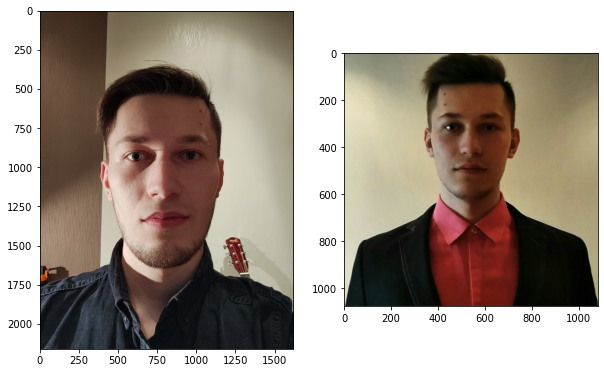

Это один человек?  True
distance:  0.47390148
max_threshold_to_verify 0.55
model: OpenFace


In [ ]:
test_1 = verify(img1_path,img2_path)

In [ ]:
# вычисление евклидова расстояния
ed_1 = distance.euclidean(fd_1, fd_2)
print(ed_1)

0.37958304855629793


In [ ]:
delta = test_1 - ed_1
print("Разница: ", delta)

Разница:  0.09431843188002714


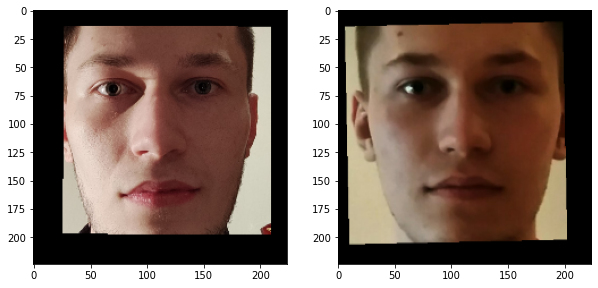

In [ ]:
show_face(img1_path, img2_path)

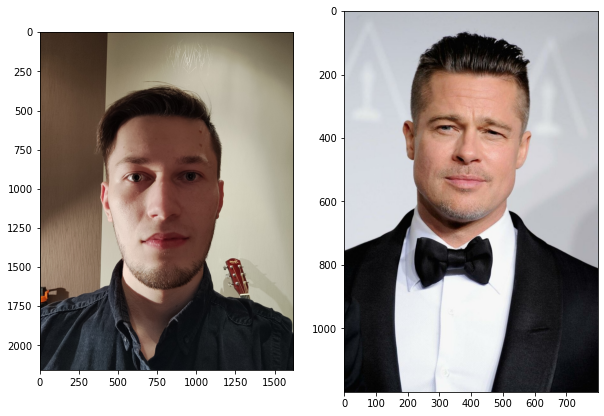

Это один человек?  False
distance:  0.83176553
max_threshold_to_verify 0.55
model: OpenFace


In [ ]:
test_2 = verify(img1_path, img3_path)

In [ ]:
# вычисление евклидова расстояния
ed_2 = distance.euclidean(fd_1, fd_3)
print(ed_2)

0.757519572726189


In [ ]:
delta = test_2 - ed_2
print("Разница: ", delta)

Разница:  0.07424595976740234


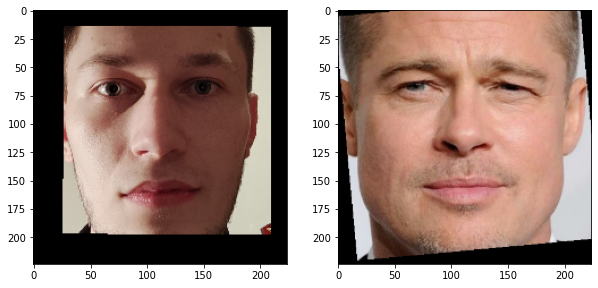

In [ ]:
show_face(img1_path, img3_path)

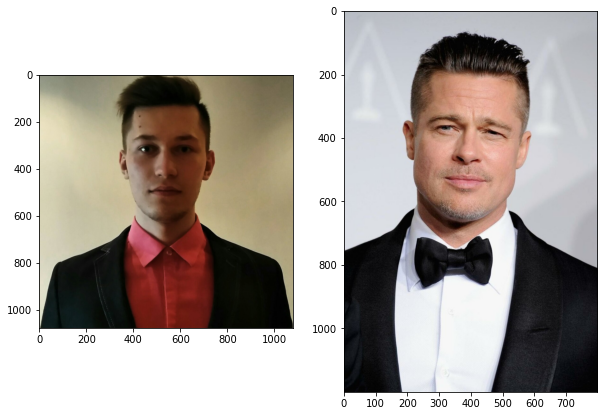

Это один человек?  False
distance:  0.79984766
max_threshold_to_verify 0.55
model: OpenFace


In [ ]:
test_3 = verify(img2_path, img3_path)

In [ ]:
# вычисление евклидова расстояния
ed_3 = distance.euclidean(fd_2, fd_3)
print(ed_3)

0.8079161693147465


In [ ]:
delta = test_3 - ed_3
print("Разница: ", delta)

Разница:  -0.008068506865863467


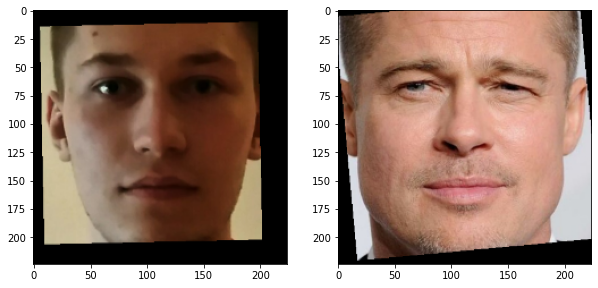

In [ ]:
show_face(img2_path, img3_path)

In [ ]:
verify(img1_path, img4_path)
# Не удаётся распознать лицо на изображении, т.к. голова повёрнута
# как итог - ошибка!

ValueError: ignored

## 8) Тест на видео с вебки

С видео вообще беда, не работает ничего

In [ ]:
cap = cv2.VideoCapture(1)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

cap.set(3,1280)
cap.set(4,700)

print(cap.get(3))
print(cap.get(4))

In [ ]:
DeepFace.stream("/content/drive/My Drive/LAB_3", model_name = 'OpenFace', enable_face_analysis=False, distance_metric='eucledian')

Finding embedding for 1.jpg:   0%|          | 0/8 [00:00<?, ?it/s]

OpenFace  is built


Finding embedding for 1.jpg: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

Embeddings found for given data set in  8.714044570922852  seconds


AttributeError: ignored